In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [7]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=.2,random_state=0)

In [8]:
lr  = LinearRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

r2_score(y_test,y_pred)

0.6369606518338295

In [9]:
lr = LinearRegression()
print(np.mean(cross_val_score(lr, x,y ,scoring='r2')))

0.4609940491662866


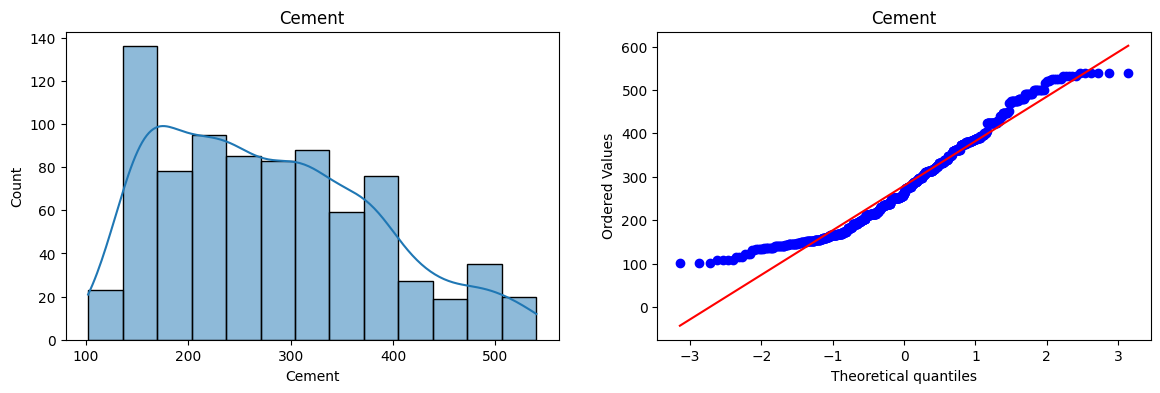

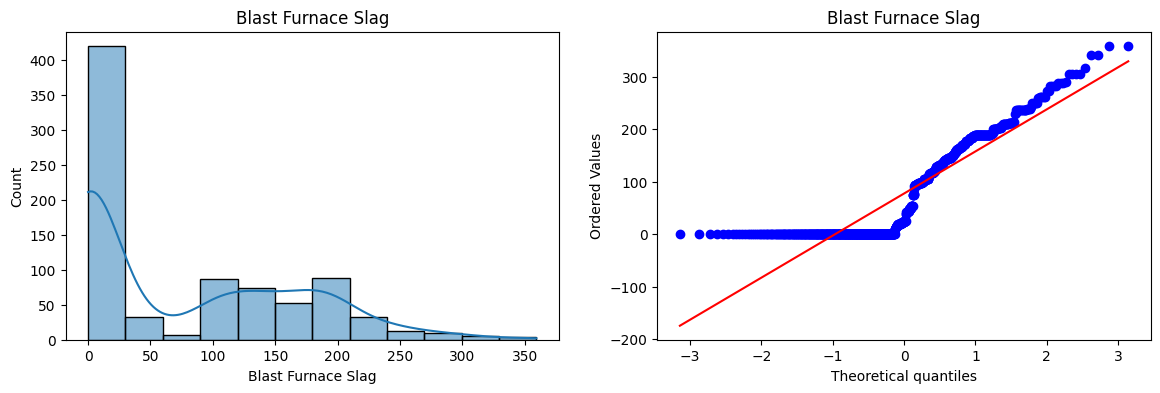

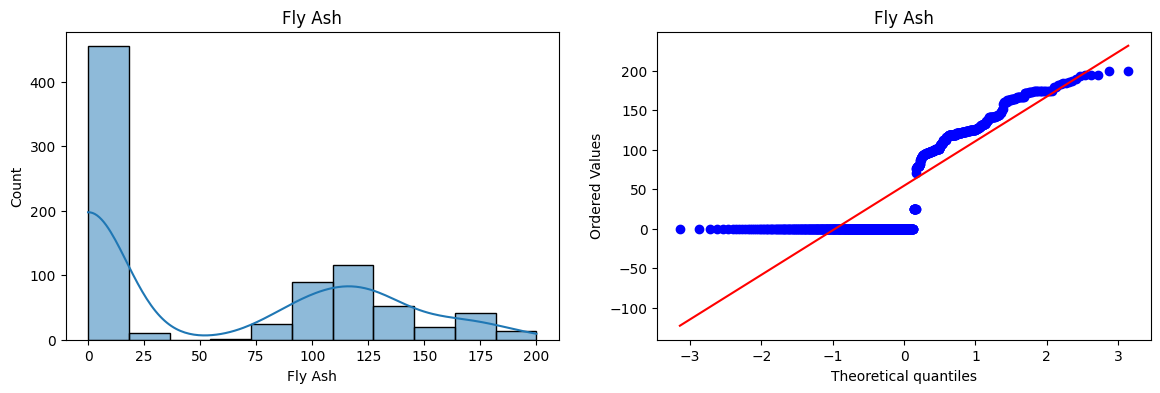

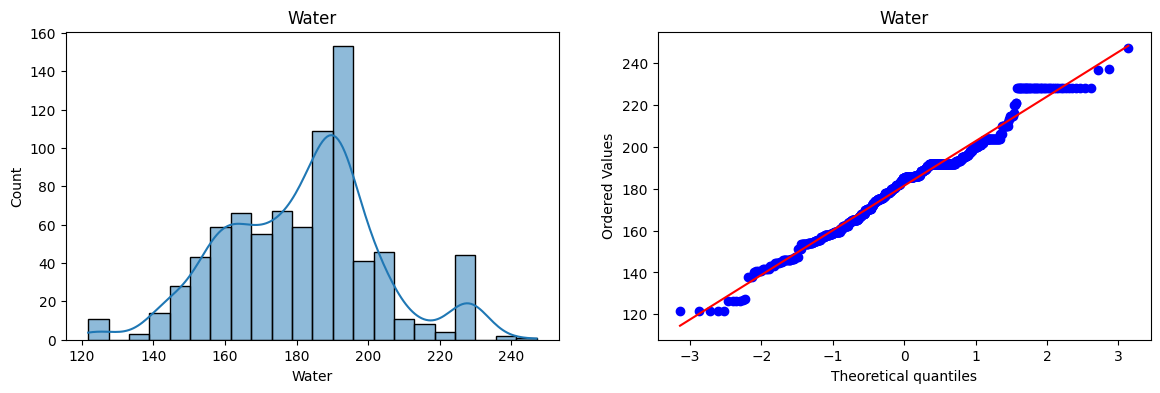

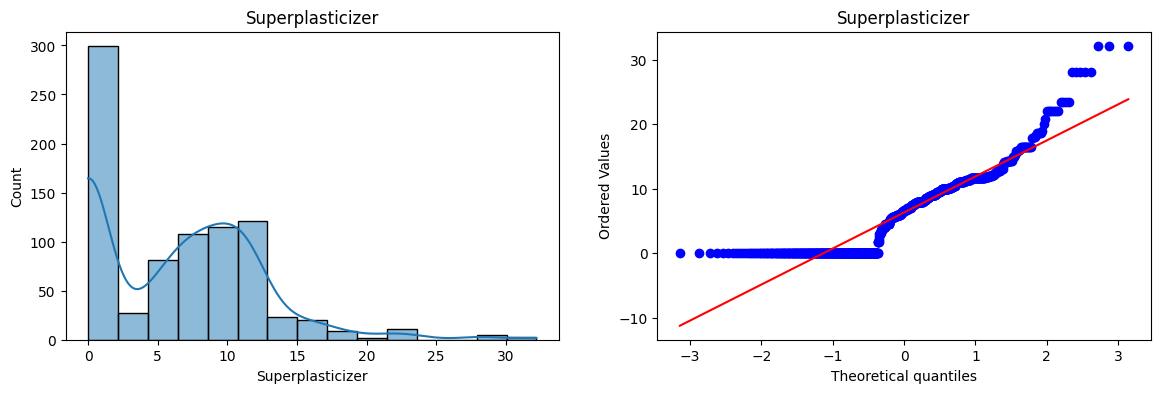

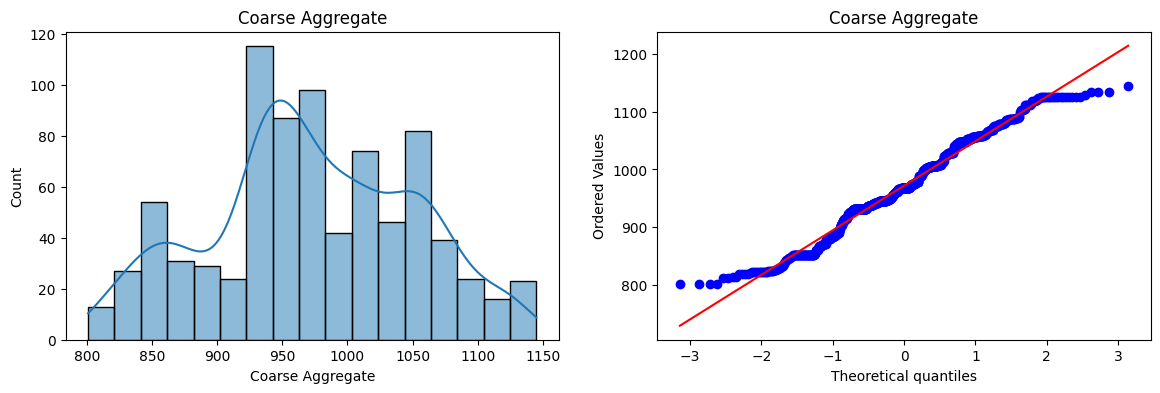

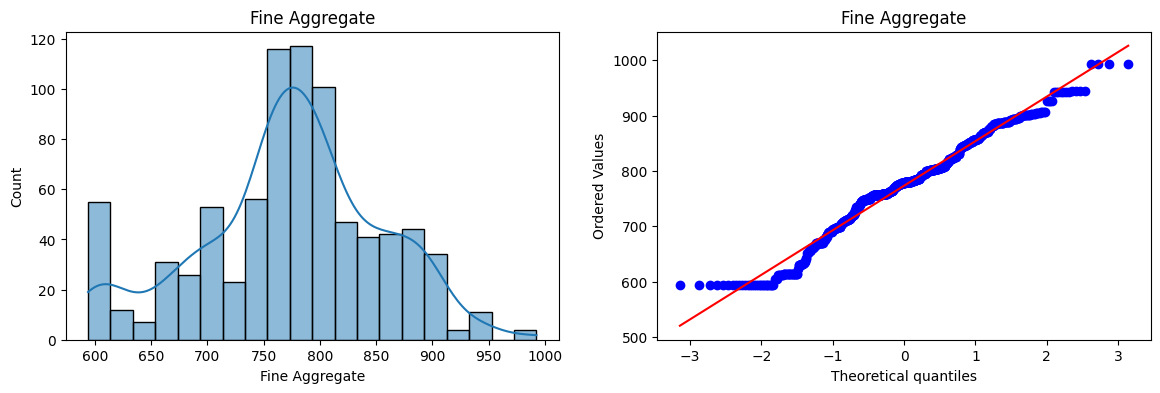

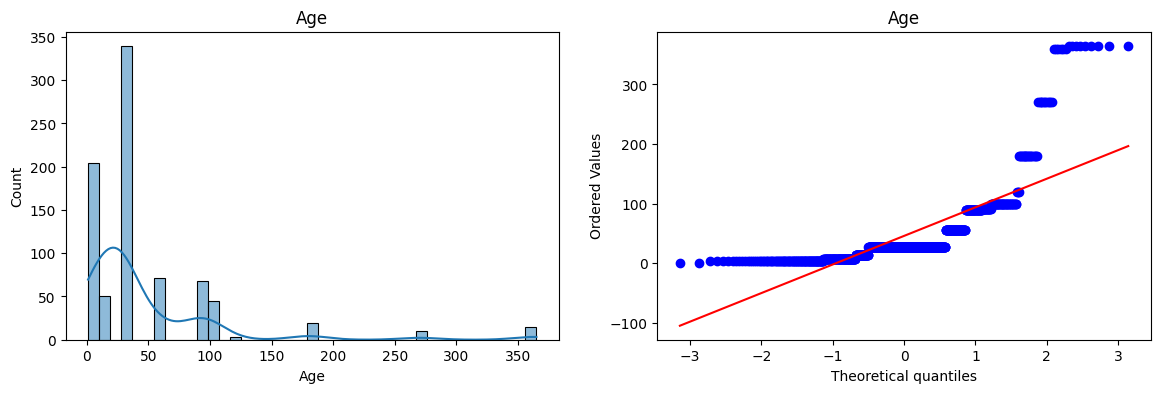

In [10]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist='norm', plot = plt)
    plt.title(col)

    plt.show()

In [40]:
pt = PowerTransformer(method='box-cox')

x_train_transformed = pt.fit_transform(x_train+0.000000001)
x_test_transformed = pt.transform(x_test+.000000001)

pd.DataFrame({'cols':x_train.columns, 'box_cox_lamdas':pt.lambdas_})

,cols,box_cox_lamdas
0,Cement,0.153049
1,Blast Furnace Slag,0.023681
2,Fly Ash,-0.024811
3,Water,0.888072
4,Superplasticizer,0.077525
5,Coarse Aggregate,1.115681
6,Fine Aggregate,1.789591
7,Age,0.063010


In [41]:

lr = LinearRegression()
lr.fit(x_train_transformed, y_train)

y_pred2 = lr.predict(x_test_transformed)

r2_score(y_test, y_pred)

0.6369606518338295

In [14]:
pt = PowerTransformer(method='box-cox')
x_transformed = pt.fit_transform(x+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed,y,scoring='r2'))

np.float64(0.6658537935430975)

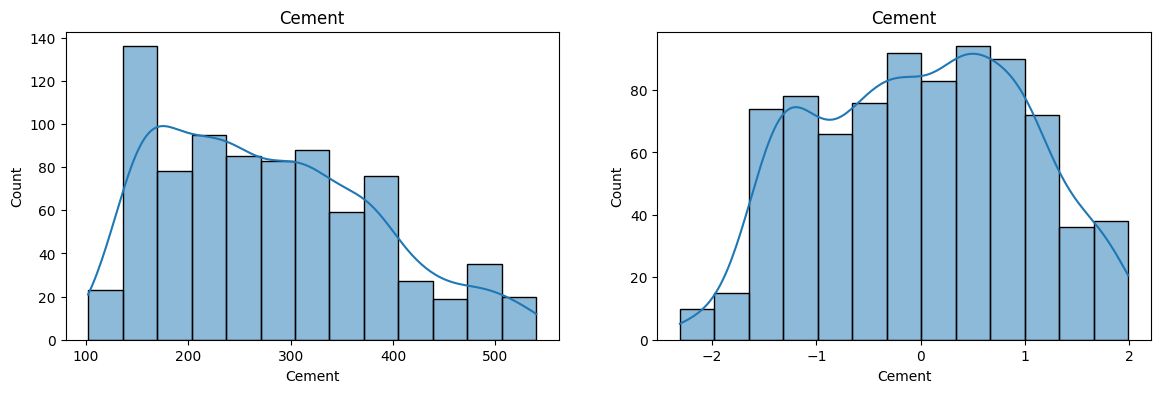

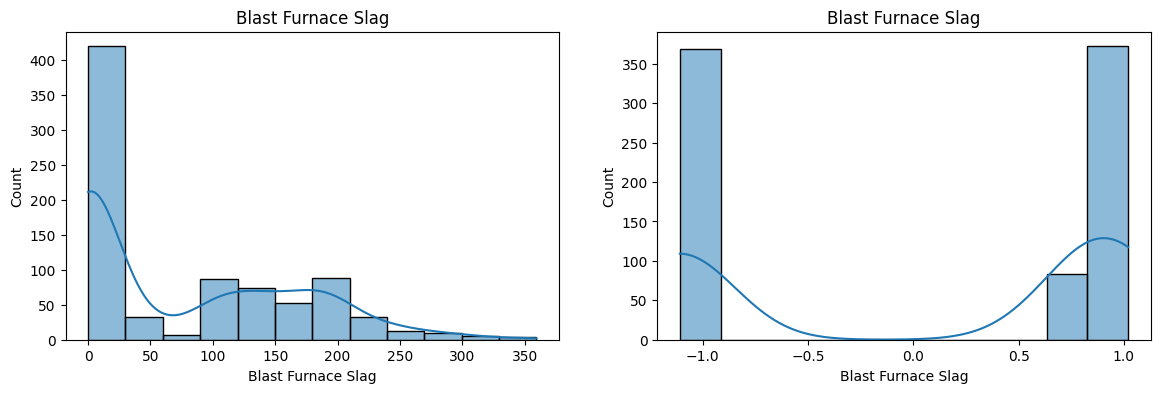

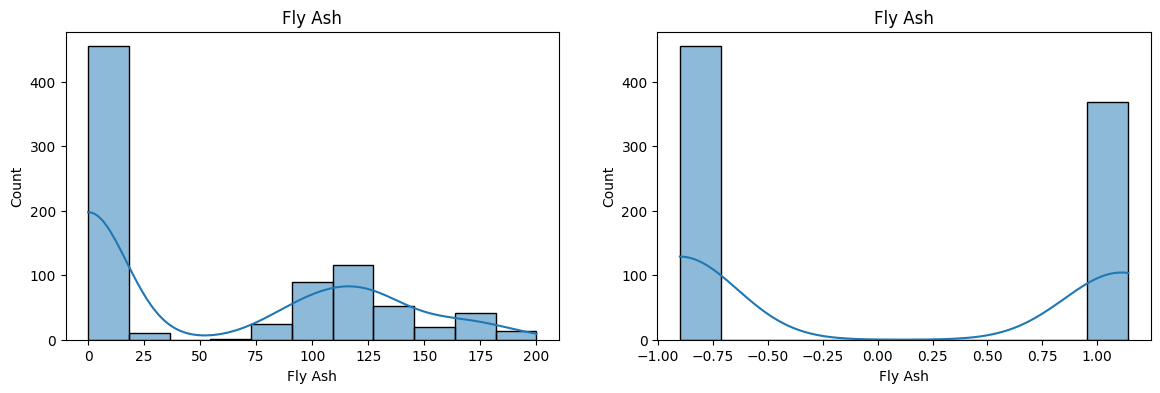

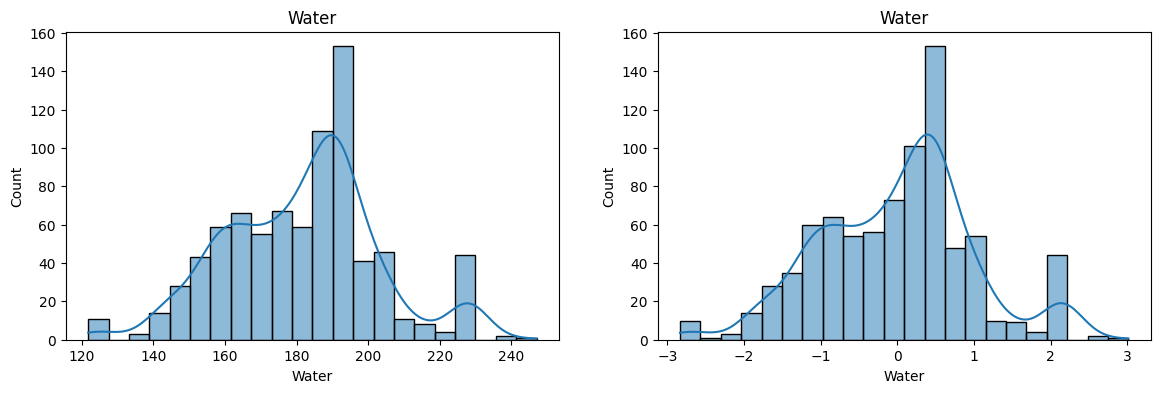

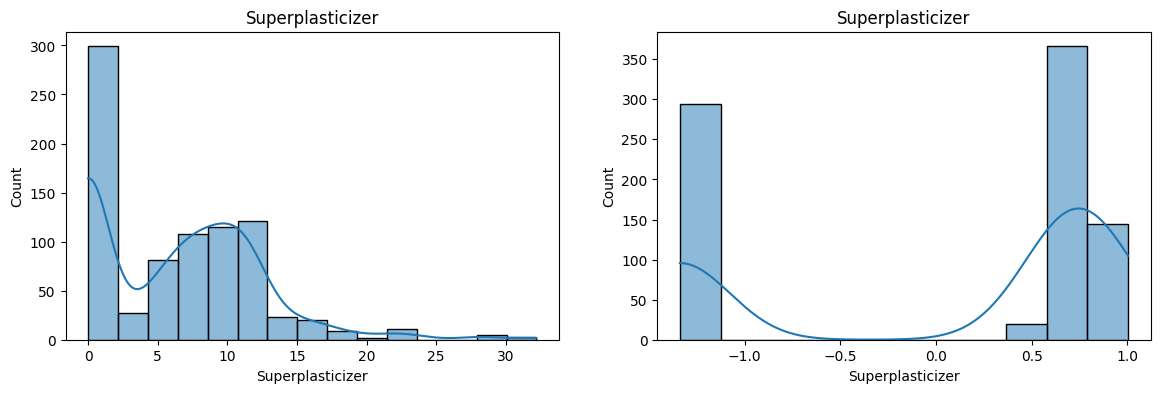

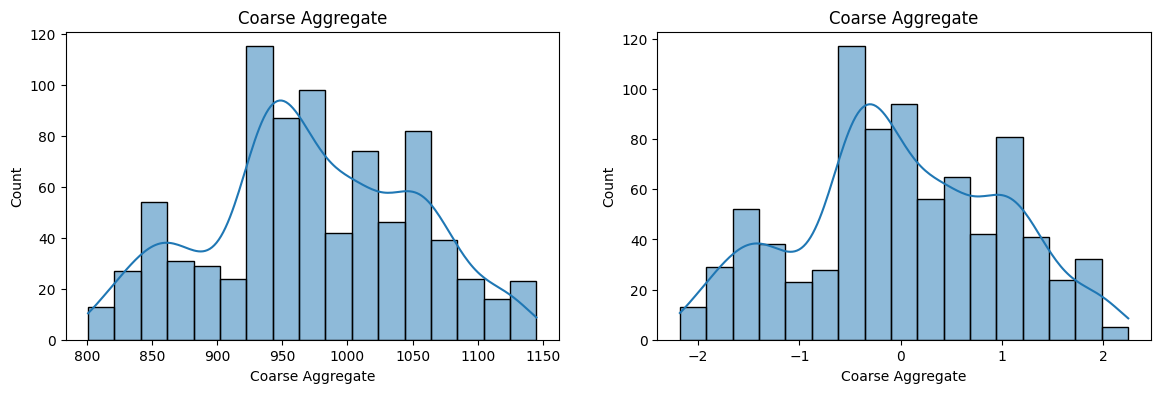

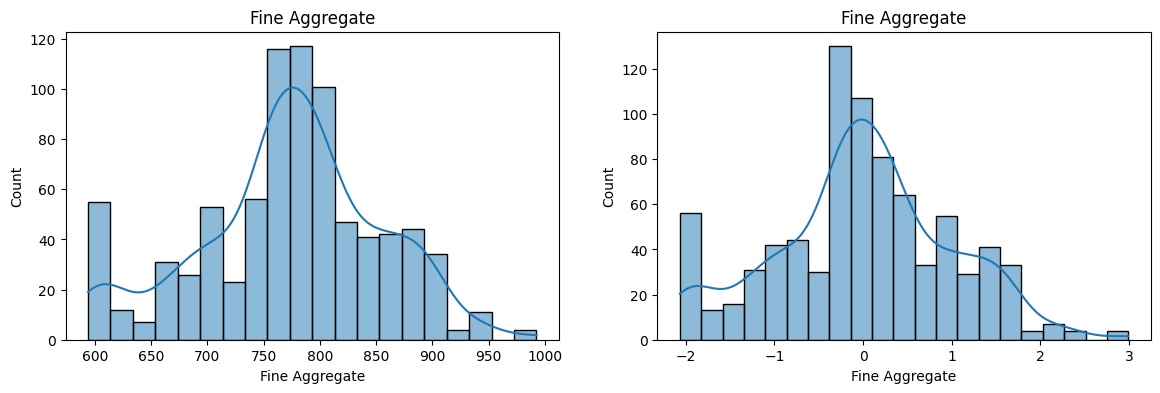

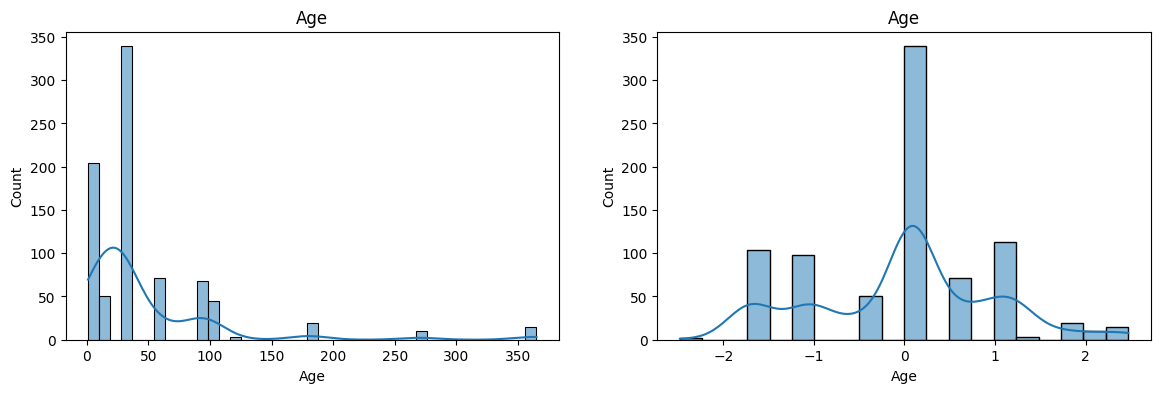

In [43]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)
for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_transformed[col], kde=True)
    plt.title(col)
    plt.show()

In [23]:
pl1 = PowerTransformer()

x_train_transformed2 = pl1.fit_transform(x_train)
x_test_transformed2 = pl1.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed2, y_train)

y_pred3 = lr.predict(x_test_transformed2)

print(r2_score(y_test, y_pred3))

pd.DataFrame({'cols':x_train.columns, 'yeo_johnson_lamdas':pl1.lambdas_})



0.8253744908767402


,cols,yeo_johnson_lamdas
0,Cement,0.150260
1,Blast Furnace Slag,0.038667
2,Fly Ash,-0.141876
3,Water,0.887369
4,Superplasticizer,0.293603
5,Coarse Aggregate,1.115901
6,Fine Aggregate,1.790678
7,Age,0.016397


In [31]:
pt1 = PowerTransformer()
x_train_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_train_transformed2,y,scoring='r2'))

np.float64(0.6834625141500865)

In [32]:
x_train_transformed2 = pd.DataFrame(x_train_transformed2,columns=x_train.columns)

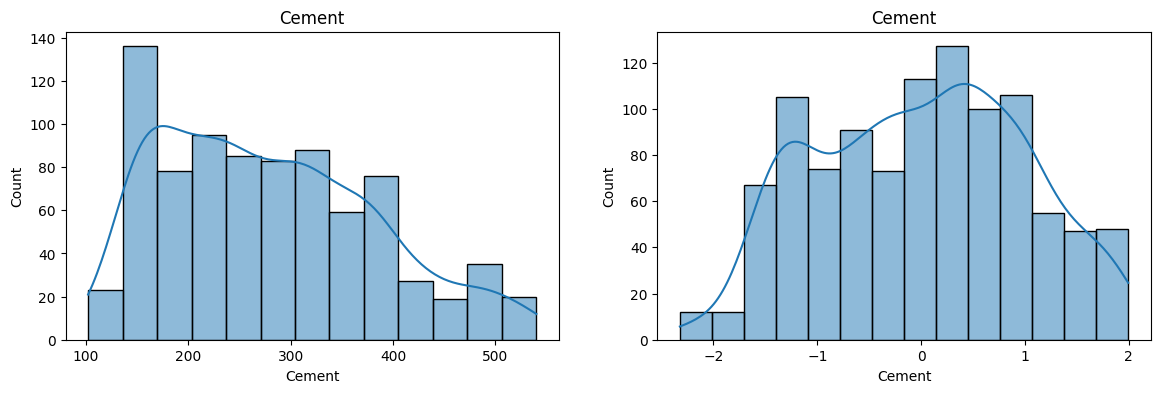

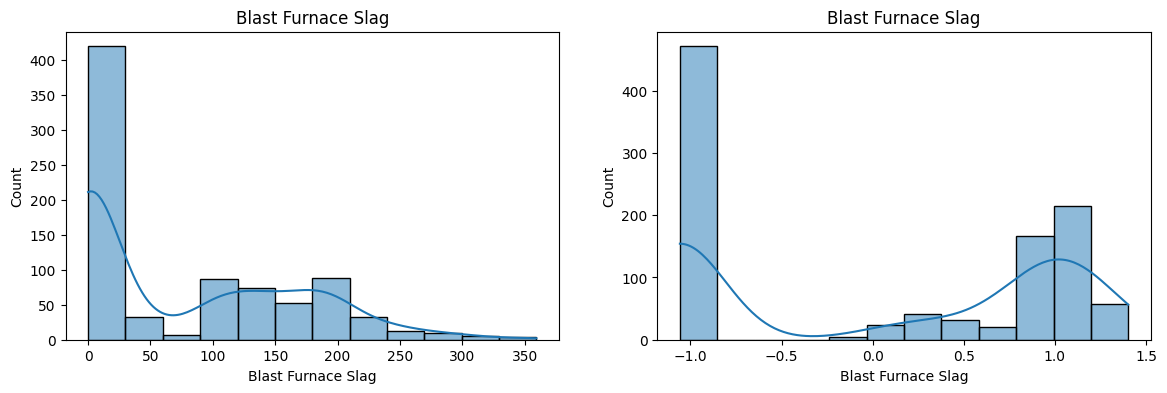

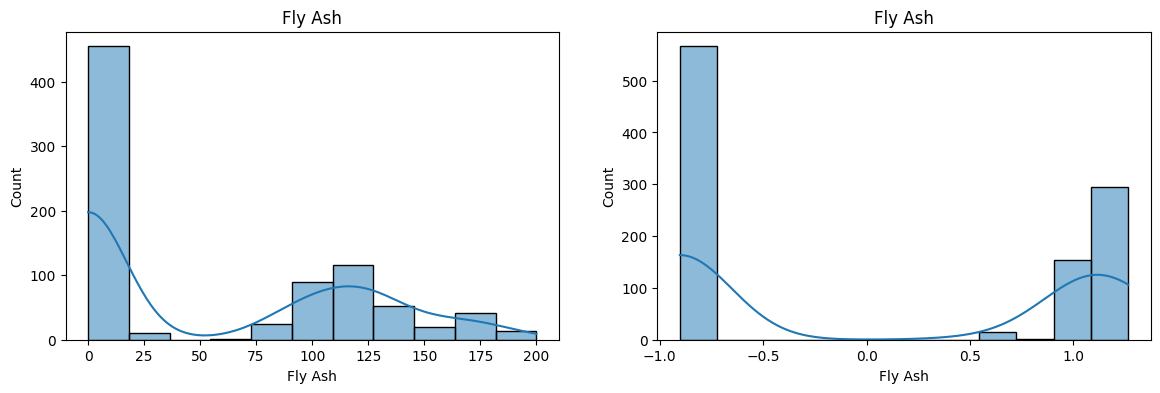

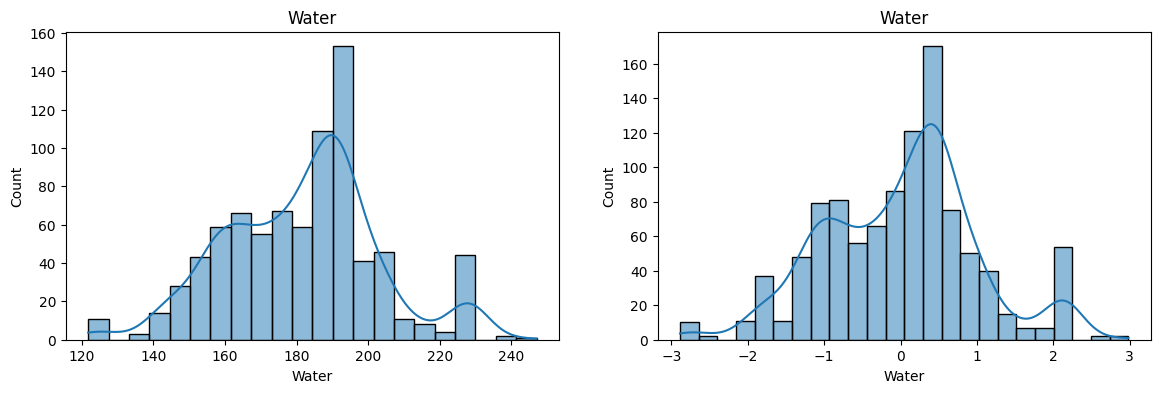

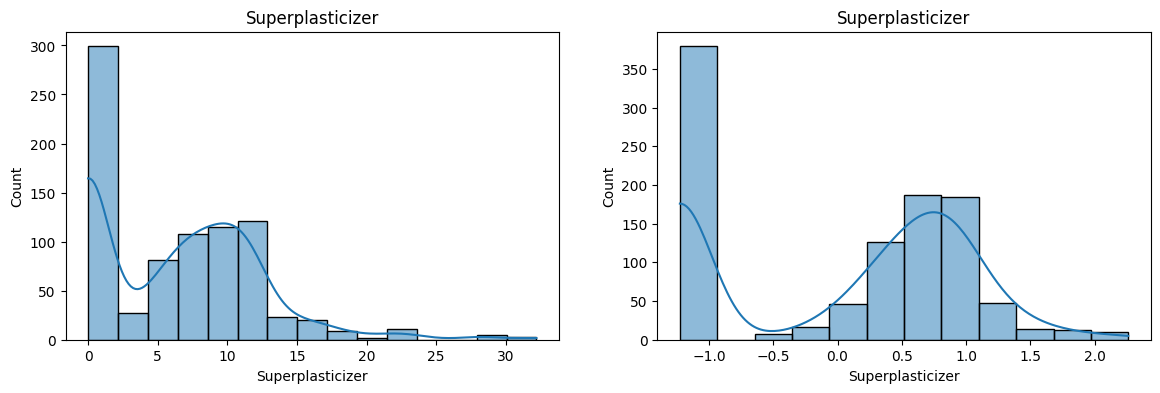

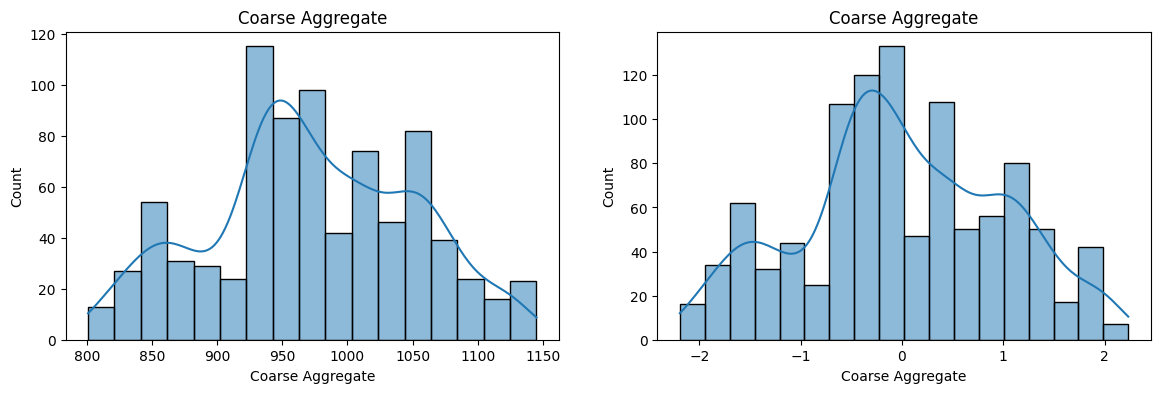

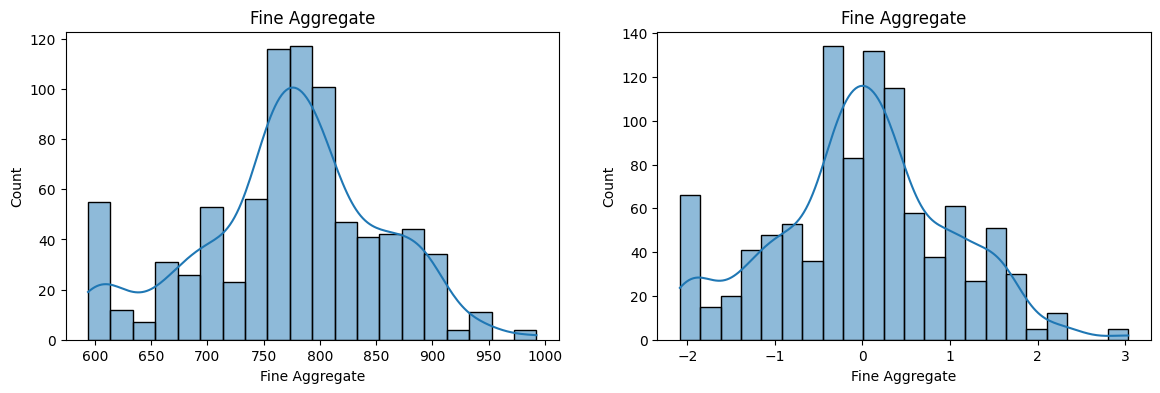

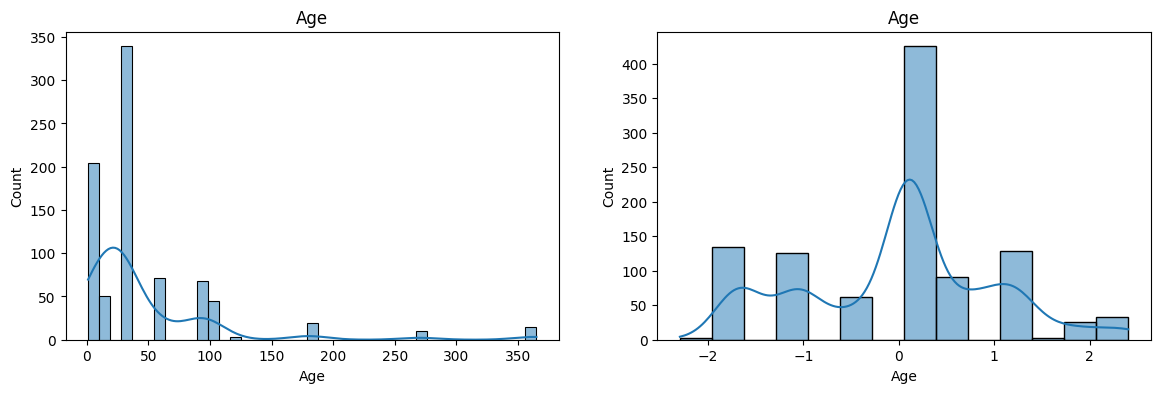

In [44]:
for col in x_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_transformed2[col], kde=True)
    plt.title(col)

    plt.show()

In [37]:
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pl1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.150260
1,Blast Furnace Slag,0.016633,0.038667
2,Fly Ash,-0.136480,-0.141876
3,Water,0.808438,0.887369
4,Superplasticizer,0.264160,0.293603
5,Coarse Aggregate,1.129395,1.115901
6,Fine Aggregate,1.830763,1.790678
7,Age,0.001771,0.016397
